<h1>YOLOv2 implementation on Pascal VOC 2007</h1>

The Pascal VOC 2007 dataset consists of many images along with annotations which contain the class, size of that particular image, the coordinates of the diagonals of the bounding boxes in the image and various other important features related to that image. The format of the annotation is .xml. 

So, our <b>first task</b> will be to read a particular image as well as utilize the annotations provided to draw the bounding boxes around the objects of interest in the image.

So, we will consider just one image and its annotation. We will work towards developing a function using suitable libraries which will return us the coordinates of the bounding boxes as well as the class. Then we will use those coordinates to plot the bounding box(es), if any, in the image along with the class label.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') # This is used so that we can access the files in google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


The shape of the sample image is (375, 500, 3)
The sample image is:


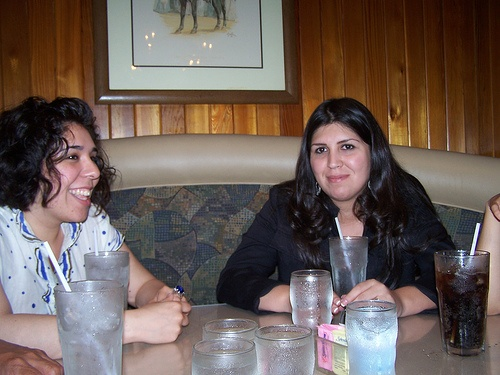

In [2]:
import cv2 # cv2 library is used to perform operations on the images after loading them
from google.colab.patches import cv2_imshow # cv2.imshow() is not supported in google colab

img = cv2.imread('/content/gdrive/My Drive/1.jpg')
print('The shape of the sample image is', img.shape)
print('The sample image is:')
cv2_imshow(img)

k = 10 # k is for simplicity. Don't worry about it now.

**XML** stands for **"Extensible Markup Language"**. For processing the .xml file, we are going to use **xml.etree.ElementTree** module. It implements a simple and efficient API for parsing and creating xml data. XML has a *hierarchial* data format. Intuitively, it can be represented using **trees** (due to hierarchy).

ET has two classes for this purpose - **ElementTree** represents the whole XML document as a tree and **Element** represents a single node in this tree. Interactions with the whole document (reading and writing to/from files) are usually done on the ElementTree level. 
Interactions with a single XML element and its sub-elements are done on the Element level. Hence, we will deal with the .xml data 
in the Element level.

In [3]:
import xml.etree.ElementTree as ET

tree = ET.parse('/content/gdrive/My Drive/1.xml') # This means that we have initialized the tree
root = tree.getroot() # The root of the file is <annotation>. The tags below it are called the child elements which may or may not
                      # have attributes (in the form of key-value pair. In this case we don't have them). These child elements have
                      # further sub-child elements. In the root we are storing the address of the root of the tree i.e the address 
                      # of the annotation node.
print('This is how we print the tag and attributes of a particular node (element)')
print(root.tag, root.attrib) # Every part of a tree (root included) has a tag that describes the element. So the
                # tag corresponding to the root in this case is 'annotation'. Also we can see the 
                # the attributes corresponding to a particular node in the tree.
                # In this case there are no attributes. Thus, an empty dictionary will be returned.
print('       ')
# We can iterate over the sub-elements of the loop and print the tags and attributes of the child elements.
print('Iterating over the sub-elements of root:')
for child in root:
  print(child.tag, child.attrib)
# Typically, it's useful to know all the elements in the entire tree. We will use root.iter() for this purpose
print('       ')
print('All the elements in the entire tree are:')
[elem.tag for elem in root.iter()] # This will return a list.
# This gives us a general notion of how many elements we have in the list, but it does not show the attributes or levels in the tree

This is how we print the tag and attributes of a particular node (element)
annotation {}
       
Iterating over the sub-elements of root:
folder {}
filename {}
source {}
owner {}
size {}
segmented {}
object {}
object {}
object {}
object {}
       
All the elements in the entire tree are:


['annotation',
 'folder',
 'filename',
 'source',
 'database',
 'annotation',
 'image',
 'flickrid',
 'owner',
 'flickrid',
 'name',
 'size',
 'width',
 'height',
 'depth',
 'segmented',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax',
 'object',
 'name',
 'pose',
 'truncated',
 'difficult',
 'bndbox',
 'xmin',
 'ymin',
 'xmax',
 'ymax']

In [4]:

"""
There is a useful method to see the entire document. Every element has a .tostring() method. Passing the root to the .tostring()
method will return us the whole document. Since ElementTree is a powerful library that can interpret more than just XML, you 
must specify both the encoding and decoding of the document you are displaying as the string. For XMLs, use 'utf8' - this is the 
typical document format type for an XML.
"""
print(ET.tostring(root, encoding='utf8').decode('utf8')) # Unicode transformation format. utf8 encoding and decoding is used 
                                                         # because of the prevalance of many new characters in different languages.
                                                         # Earlier ASCII was used but it didn't suffice for the wide range of 
                                                         # characters in different languages. utf8 1 byte corresponds to ASCII.

<?xml version='1.0' encoding='utf8'?>
<annotation>
	<folder>VOC2007</folder>
	<filename>000035.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
		<flickrid>338126319</flickrid>
	</source>
	<owner>
		<flickrid>GabaGaba</flickrid>
		<name>Gabba Gabba</name>
	</owner>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1</xmin>
			<ymin>96</ymin>
			<xmax>191</xmax>
			<ymax>361</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Frontal</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>218</xmin>
			<ymin>98</ymin>
			<xmax>465</xmax>
			<ymax>318</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficu

In [5]:
# In this way we can use root.iter to find and print(using .text) the values inside a particular element. 
for xmin in root.iter('xmin'):
  print(xmin.text)

print("       ")

print(type(root.findall("./size/width")[0].text))

1
218
468
3
       
<class 'str'>


In [6]:
# Now we will use XPath (a query language) which help us to search through a XML document quickly and easily. We will use .findall()
# method in the ElementTree class that can traverse a path that can be specified by XPath.
for ymin in root.findall("./object/bndbox/ymin"):
  Ymin = int(ymin.text)
  print(Ymin)

96
98
195
304


As we are now acquainted with the methods in the class **xml.etree.ElementTree**, we are now going to use these methods to store the data in the image in the form of a dictionary.

In [7]:
classes = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
print('The number of classes in PASCAL VOC 2007 dataset is', len(classes))

count = 0 # Firstly, we will count the  number of objects in the image. 
for object_name in root.findall("./object/name"):
  count = count + 1
print('The number of objects in the image is', count)
objectDict = {} # We are creating an object dictionary which will contain all the information about the object. It will be of the
                # form {objectID : [classId, (xmin + xmax)/2, (ymin + ymax)/2, xmax - xmin, ymax - ymin, width, height]} according to the format
                # of Yolo outputs
i = 0
for object_name in root.findall("./object/name"):
  objectDict[i] = []
  for m in range(len(classes)):
    if(object_name.text == classes[m]):
      break
  objectDict[i].append(m)
  objectDict[i].append(int((int(root.findall('./object/bndbox/xmin')[i].text) + int(root.findall('./object/bndbox/xmax')[i].text))/2))
  objectDict[i].append(int((int(root.findall('./object/bndbox/ymin')[i].text) + int(root.findall('./object/bndbox/ymax')[i].text))/2))
  objectDict[i].append(int(int(root.findall('./object/bndbox/xmax')[i].text) - int(root.findall('./object/bndbox/xmin')[i].text)))
  objectDict[i].append(int(int(root.findall('./object/bndbox/ymax')[i].text) - int(root.findall('./object/bndbox/ymin')[i].text)))
  objectDict[i].append(int(root.findall('./size/width')[0].text))
  objectDict[i].append(int(root.findall('./size/height')[0].text))
  
  i = i + 1

bbDict = {}
# But for drawing rectangles with the help of opencv, we require (xmin, ymin) and (xmax, ymax) as the inputs. Therefore, we will
# create another dictionary just for drawing the bounding boxes on the image. Its format will be:
# {objectID : [classId, xmin, ymin, xmax, ymax, width, height]}
i = 0
for object_name in root.findall("./object/name"):
  bbDict[i] = []
  for m in range(len(classes)):
    if(object_name.text == classes[m]):
      break
  bbDict[i].append(m)
  bbDict[i].append(int(root.findall('./object/bndbox/xmin')[i].text))
  bbDict[i].append(int(root.findall('./object/bndbox/ymin')[i].text))
  bbDict[i].append(int(root.findall('./object/bndbox/xmax')[i].text))
  bbDict[i].append(int(root.findall('./object/bndbox/ymax')[i].text))
  bbDict[i].append(int(root.findall('./size/width')[0].text))
  bbDict[i].append(int(root.findall('./size/height')[0].text))
  
  i = i + 1

The number of classes in PASCAL VOC 2007 dataset is 20
The number of objects in the image is 4


In [8]:
# Now we will print the dictionaries
print(objectDict)
print(bbDict)

{0: [14, 96, 228, 190, 265, 500, 375], 1: [14, 341, 208, 247, 220, 500, 375], 2: [14, 484, 256, 32, 122, 500, 375], 3: [10, 251, 339, 497, 71, 500, 375]}
{0: [14, 1, 96, 191, 361, 500, 375], 1: [14, 218, 98, 465, 318, 500, 375], 2: [14, 468, 195, 500, 317, 500, 375], 3: [10, 3, 304, 500, 375, 500, 375]}


The image with bounding boxes is:


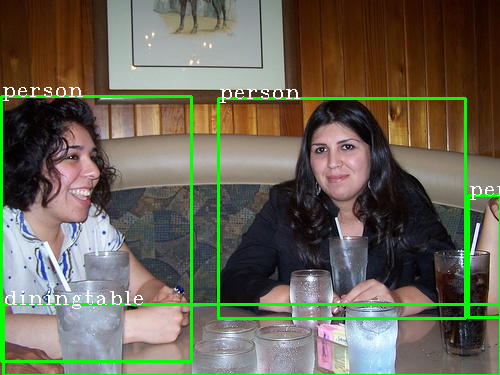

In [9]:
# We are defining the arguements of cv2.putText
font                   = cv2.FONT_HERSHEY_COMPLEX_SMALL
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 1

i = 0;
for i in range(count):
  (xmin, ymin) = (bbDict[i][1], bbDict[i][2])
  (xmax, ymax) = (bbDict[i][3], bbDict[i][4])
  text = classes[bbDict[i][0]]
  bottomLeftCornerOfText = (xmin, ymin)
  cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
  cv2.putText(img,text, 
    bottomLeftCornerOfText, 
    font, 
    fontScale,
    fontColor,
    lineType)
  
print('The image with bounding boxes is:')
cv2_imshow(img)

Now we have plotted the bounding boxes for a sample image from the training dataset. Now, we are going to create a function which will read images and annotations from the folder, create a list of images and a list of dictionaries (objectDict and bbDict).

In [10]:
import os # Provides miscellaneous operating system interfaces

# Function to load images from the given folder path (of the training, validation or test images) and store those ndarrays in a list
def load_img(folder):
  images = []
  c = 0
  for filename in os.listdir(folder):
    c = c + 1
    img = cv2.imread(os.path.join(folder, filename))
    images.append(img)
    if c == k:
      break
  return images

# Testing of the above function
train_Image_List =  load_img('/content/gdrive/My Drive/Yolov2/JPEGImages/')
print('The length of the train image list is', len(train_Image_List))

# Function to load the annotations and return a list of dictionaries bbDict and objectDict
def load_anno(folder):
  bbDictList = []
  objectDictList = []
  c = 0
  for filename in os.listdir(folder):
    c = c + 1
    tree = ET.parse(os.path.join(folder, filename))
    root = tree.getroot()
    count = 0  
    for object_name in root.findall("./object/name"):
      count = count + 1
    objectDict = {} 
    i = 0
    for object_name in root.findall("./object/name"):
      objectDict[i] = []
      for m in range(len(classes)):
        if(object_name.text == classes[m]):
          break
      objectDict[i].append(m)
      objectDict[i].append(int((int(root.findall('./object/bndbox/xmin')[i].text) + int(root.findall('./object/bndbox/xmax')[i].text))/2))
      objectDict[i].append(int((int(root.findall('./object/bndbox/ymin')[i].text) + int(root.findall('./object/bndbox/ymax')[i].text))/2))
      objectDict[i].append(int(int(root.findall('./object/bndbox/xmax')[i].text) - int(root.findall('./object/bndbox/xmin')[i].text)))
      objectDict[i].append(int(int(root.findall('./object/bndbox/ymax')[i].text) - int(root.findall('./object/bndbox/ymin')[i].text)))
      objectDict[i].append(int(root.findall('./size/width')[0].text))
      objectDict[i].append(int(root.findall('./size/height')[0].text))
      i = i + 1

    bbDict = {}
    i = 0
    for object_name in root.findall("./object/name"):
      bbDict[i] = []
      for m in range(len(classes)):
        if(object_name.text == classes[m]):
          break
      bbDict[i].append(m)
      bbDict[i].append(int(root.findall('./object/bndbox/xmin')[i].text))
      bbDict[i].append(int(root.findall('./object/bndbox/ymin')[i].text))
      bbDict[i].append(int(root.findall('./object/bndbox/xmax')[i].text))
      bbDict[i].append(int(root.findall('./object/bndbox/ymax')[i].text))
      bbDict[i].append(int(root.findall('./size/width')[0].text))
      bbDict[i].append(int(root.findall('./size/height')[0].text))
      i = i + 1
    bbDictList.append(bbDict)
    objectDictList.append(objectDict)
    if c == k:
      break
  return (bbDictList, objectDictList)

# Now we will test the above function
train_Image_bbDictList, train_Image_objectDictList = load_anno('/content/gdrive/My Drive/Yolov2/Annotations/')
print('The length of train image bounding box dictionary list is', len(train_Image_bbDictList))
print('The length of train image object dictionary list is', len(train_Image_objectDictList))
print('       ')
print('Sample from train_Image_bbDictList', train_Image_bbDictList[0])
print('       ')
print('Sample from train_Image_objectDictList', train_Image_objectDictList[0])

The length of the train image list is 10
The length of train image bounding box dictionary list is 10
The length of train image object dictionary list is 10
       
Sample from train_Image_bbDictList {0: [7, 162, 101, 330, 306, 500, 375], 1: [17, 1, 1, 499, 373, 500, 375]}
       
Sample from train_Image_objectDictList {0: [7, 246, 203, 168, 205, 500, 375], 1: [17, 250, 187, 498, 372, 500, 375]}


First of all, I tried the normal YOLOv1 approach. As I am too lazy to find the IOU, I didn;t include IOU in the box confidence score. But the results were too bad. So, I used 3 different networks and trained them simulataneously. I took the losses from all these three networks and combined them into a single loss(explained later). Then I used back-propagation to train the model. I overfitted the model so as to check the output. (Again I am too lazy to plot the bounding boxes again)

We were able to create ground truth labels for a single annotation dictionary. In the next step, we will define a function which returns a list of all these ground truth labels for given train annotation lists of dictionaries

In [39]:
"""
Lines of code to check the above approach for a sample annotation
"""

import numpy as np # We will use numpy library for all the numerical computations
import math # To use the math.floor() method

# Consider a random image from the train_Image_objectDictList
objectDict = train_Image_objectDictList[0]
print('The sample dictionary is', objectDict)
count = len(list(objectDict.keys()))
print('The number of objects in the image is', count)

coordinates = []
label1 = np.zeros((7, 7, 1)) # We will modify this to create the ground truth label on which we will apply the loss function
label2 = np.zeros((7, 7, 4))
label3 = np.zeros((7, 7, 1))
label1 = label1.astype(int)
label3 = label3.astype(int)
for i in range(count):
  l = list(objectDict.values())[i]
  (M, N) = (l[5], l[6]) # Size of the image
  (Mx, Ny) = (math.floor(M/7), math.floor(N/7)) # Pixels per grid in x and y direction
  (x, y) = (math.floor(l[1]/Mx), math.floor(l[2]/Ny)) # Position of grid cell corresponding to the object
  coordinates.append((x, y))
  label1[x][y][0] = 1 # The box confidence score is 1
  label2[x][y][0] = math.sqrt((l[1]-x*Mx)/Mx) # The x coordinate of the centroid with respect to the grid cell
  label2[x][y][1] = math.sqrt((l[2]-y*Ny)/Ny) # The y coordinate of the centroid with respect to the grid cell
  label2[x][y][2] = math.sqrt(l[3]/l[5]) # Width of the bounding box with respect to the whole image
  label2[x][y][3] = math.sqrt(l[4]/l[6]) # Height of the bounding box with respect to the whole image
  label3[x][y][0] = l[0] # The class confidence score is 1

print(label2[:, :, 2]) # Checking for a particular sample

The sample dictionary is {0: [7, 246, 203, 168, 205, 500, 375], 1: [17, 250, 187, 498, 372, 500, 375]}
The number of objects in the image is 2
[[0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.997998 0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.       0.      ]]


In [12]:
"""
Here, we will define a function that will create a list of ground truth labels from the annotation path provided. It will return
that list. We will use the image list and the ground truth label list to create custom dataloaders
"""

def ground_truth_list(objectDictList):
  labelList1 = []
  labelList2 = []
  labelList3 = []
  c = 0
  for objectDict in objectDictList:
    c = c + 1
    count = len(list(objectDict.keys()))
    label1 = np.zeros((7, 7)) # We will modify this to create the ground truth label on which we will apply the loss function
    label2 = np.zeros((7, 7, 4))
    label3 = np.zeros((7, 7))
    label1 = label1.astype(int)
    label3 = label3.astype(int)
    for i in range(count):
      l = list(objectDict.values())[i]
      (M, N) = (l[5], l[6]) # Size of the image
      (Mx, Ny) = (math.floor(M/7), math.floor(N/7)) 
      (x, y) = (math.floor(l[1]/Mx), math.floor(l[2]/Ny)) 
      label1[x][y] = 1 # The box confidence score is 1
      label2[x][y][0] = math.sqrt((l[1]-x*Mx)/Mx) # The x coordinate of the centroid with respect to the grid cell
      label2[x][y][1] = math.sqrt((l[2]-y*Ny)/Ny) # The y coordinate of the centroid with respect to the grid cell
      label2[x][y][2] = math.sqrt(l[3]/l[5]) # Width of the bounding box with respect to the whole image
      label2[x][y][3] = math.sqrt(l[4]/l[6]) # Height of the bounding box with respect to the whole image
      label3[x][y] = l[0] # The class confidence score is 1
    labelList1.append(label1) 
    labelList2.append(label2)
    labelList3.append(label3)
    if c == k:
      break
  return labelList1, labelList2, labelList3

# Driver program to the test the above functions
_, objectDictList = load_anno('/content/gdrive/My Drive/Yolov2/Annotations/') # As we don't require bbDictList, we are using _ as a
                                                                              # throwaway variable
L1, L2, L3 = ground_truth_list(objectDictList)
print(L3[0][:, :].shape)

(7, 7)


So we have created functions that can load images as well as the ground truths from the path of the images and the annotations respectively. Now our next task will be to create a **custom dataloader class** in which we will override the methods `__getitem__` and `__len__`. We will also apply the transforms on the image while initializing these custom dataloaders. 

In the **transforms**, we will normalize the input image as well as convert it into a **pytorch tensor** (we are going to use pytorch as the DL framework). Here, we will use the mean and standard deviation from the imagenet dataset. But, in order to learn how to actually find the standard deviation and the mean of channels, we will calculate it for a sample image. (It will become too computationally expensive to find the mean and standard deviation for all the images in the dataset and then averaging them out. So we are using the values from the imagenet dataset)
We will also transform the output label to a pytorch tensor.

In [13]:
'''
Consider a sample image from the training dataset. We are going to find the mean and standard deviation of each channel of that
sample image.
'''
image = train_Image_List[0]
print('The shape of the image is', image.shape)

# Opencv loads the image in BGR format and not in RGB format.
B, G, R = cv2.split(image)
B = np.reshape(B, (334 * 500)) 
G = np.reshape(G, (334 * 500))
R = np.reshape(R, (334 * 500))

print('The mean of B, G and R channels are', np.mean(B)/255, np.mean(G)/255, 'and', np.mean(R)/255,'respectively.')
print('The standard deviation of B, G and R channels are', np.std(B)/255, np.std(G)/255, 'and', np.std(R)/255,'respectively.')

The shape of the image is (334, 500, 3)
The mean of B, G and R channels are 0.38702707526124225 0.4026297522601855 and 0.40999316660796054 respectively.
The standard deviation of B, G and R channels are 0.2165835854294283 0.21950673890019948 and 0.21764163052230398 respectively.


In [0]:
'''
We are going to define the transformations here - both for the image as well as the ground truth label
'''

# We are going to import the required torch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision import transforms
import torch.optim as optim

# We are going to resize all images to (448, 448) size
train_Image_Resized_List = []
for img in train_Image_List:
  img = cv2.resize(img, (448, 448), interpolation = cv2.INTER_AREA)
  train_Image_Resized_List.append(img)

transform_img = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_label = transforms.Compose([
                                      transforms.ToTensor()
])

# We have to import this library to make a custom dataloader class
from torch.utils.data import Dataset, DataLoader 

class cdataset(data.Dataset):

  def __init__(self, transform_img = None, transform_label = None, imageList = None, labelList = None):
    self.img = imageList
    self.label = labelList
    self.transform_img = transform_img
    self.transform_label = transform_label

  def __len__(self):
    return len(self.img)

  def __getitem__(self, idx):
    img = self.transform_img(self.img[idx])
    label = self.transform_label(self.label[idx])
    return img, label

# We will now instantiate the cdataset class
train_dataset1 = cdataset(transform_img, transform_label, train_Image_Resized_List, L1)
train_dataset2 = cdataset(transform_img, transform_label, train_Image_Resized_List, L2)
train_dataset3 = cdataset(transform_img, transform_label, train_Image_Resized_List, L3)

# We will now load the datset using data.Dataloader
train_loader1 = data.DataLoader(train_dataset1, batch_size=4, shuffle=False, num_workers=4)
train_loader2 = data.DataLoader(train_dataset2, batch_size=4, shuffle=False, num_workers=4)
train_loader3 = data.DataLoader(train_dataset3, batch_size=4, shuffle=False, num_workers=4)

We have instantiated the custom dataset that we had created earlier. After creating the object, we have loaded the dataset using Dataloader. Enumerating `train_loader` will give us both the training data as well as the ground truth label corresponding to the data. 

The data-preprocessing part is over now. Now we have to make the machine learning model. But yolov1 has its own set of losses. Just using the cross-entropy loss would not suffice. We have to create our own loss function. 

Forget the above statement. I have created my own model (I have explained it above).

In [0]:
"""
We will create our own loss function here
"""
def yolo_loss(output1, target1, output2, target2, output3, target3):
  criterion = nn.CrossEntropyLoss() # We will use CSE for bounding box confidence and class confidence
  loss1 = 10 * criterion(output1, target1) # Box confidence
  loss2 = 5 * torch.mean((output2 - target2)**2)
  loss3 = 5 * criterion(output3, target3)
  loss = loss1 + loss2 + loss3
  return loss

# yolo_loss(output, target)

After defining the class function, we are going to define the yolo classes. 

In [17]:
'''
We will create 3 models here
'''
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
print(device)

class yolo1(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 3, 3)
    self.conv2 = nn.Conv2d(3, 64, 3)
    self.conv3 = nn.Conv2d(64, 64, 3)
    self.conv4 = nn.Conv2d(64, 2, 4)
    self.b1 = nn.BatchNorm2d(3)
    self.b2 = nn.BatchNorm2d(64)
    self.b3 = nn.BatchNorm2d(2)
    self.pool = nn.MaxPool2d(2, 2)

  def forward(self, x):
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b2(self.conv2(x)))
    x = F.relu(self.b2(self.conv3(x)))
    x = self.pool(x)
    x = F.relu(self.b2(self.conv3(x)))
    x = F.relu(self.b2(self.conv3(x)))
    x = self.pool(x)
    x = F.relu(self.b3(self.conv4(x)))
    return x

YOLO1 = yolo1() # We are instantiating the class
YOLO1.to(device) # We put the model inside the gpu
# We will now define the optimizer
optimizer1 = optim.Adam(YOLO1.parameters(), lr = 0.001, betas = (0.9, 0.999), eps = 1e-08, weight_decay=0, amsgrad=False)

class yolo2(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 3, 3)
    self.conv2 = nn.Conv2d(3, 64, 3)
    self.conv3 = nn.Conv2d(64, 64, 3)
    self.conv4 = nn.Conv2d(64, 4, 4)
    self.b1 = nn.BatchNorm2d(3)
    self.b2 = nn.BatchNorm2d(64)
    self.b3 = nn.BatchNorm2d(4)
    self.pool = nn.MaxPool2d(2, 2)

  def forward(self, x):
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b2(self.conv2(x)))
    x = F.relu(self.b2(self.conv3(x)))
    x = self.pool(x)
    x = F.relu(self.b2(self.conv3(x)))
    x = F.relu(self.b2(self.conv3(x)))
    x = self.pool(x)
    x = F.relu(self.b3(self.conv4(x)))
    return x

YOLO2 = yolo2() # We are instantiating the class
YOLO2.to(device) # We put the model inside the gpu
# We will now define the optimizer
optimizer2 = optim.Adam(YOLO2.parameters(), lr = 0.001, betas = (0.9, 0.999), eps = 1e-08, weight_decay=0, amsgrad=False)

class yolo3(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 3, 3)
    self.conv2 = nn.Conv2d(3, 64, 3)
    self.conv3 = nn.Conv2d(64, 64, 3)
    self.conv4 = nn.Conv2d(64, 20, 4)
    self.b1 = nn.BatchNorm2d(3)
    self.b2 = nn.BatchNorm2d(64)
    self.b3 = nn.BatchNorm2d(20)
    self.pool = nn.MaxPool2d(2, 2)

  def forward(self, x):
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b1(self.conv1(x)))
    x = F.relu(self.b1(self.conv1(x)))
    x = self.pool(x)
    x = F.relu(self.b2(self.conv2(x)))
    x = F.relu(self.b2(self.conv3(x)))
    x = self.pool(x)
    x = F.relu(self.b2(self.conv3(x)))
    x = F.relu(self.b2(self.conv3(x)))
    x = self.pool(x)
    x = F.relu(self.b3(self.conv4(x)))
    return x

YOLO3 = yolo3() # We are instantiating the class
YOLO3.to(device) # We put the model inside the gpu
# We will now define the optimizer
optimizer3 = optim.Adam(YOLO3.parameters(), lr = 0.001, betas = (0.9, 0.999), eps = 1e-08, weight_decay=0, amsgrad=False)

cuda:0


Now, **finally** we will start the training. Just wait and watch how the loss converges with the number of epochs.

In [0]:
losses = []
for j in range(100):
  for i, data1 in enumerate(train_loader1):
    for k, data2 in enumerate(train_loader2):
      for l, data3 in enumerate(train_loader3):
        inputs1, labels1 = data1
        labels1 = labels1.view((labels1.size()[0], 7, 7))
        inputs1, labels1 = inputs1.to(device), labels1.to(device)
        inputs2, labels2 = data2
        inputs2, labels2 = inputs2.to(device), labels2.to(device)
        inputs3, labels3 = data3
        labels3 = labels3.view((labels3.size()[0], 7, 7))
        inputs3, labels3 = inputs3.to(device), labels3.to(device)
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        optimizer3.zero_grad()
        outputs1 = YOLO1(inputs1)
        outputs2 = YOLO2(inputs2)
        outputs3 = YOLO3(inputs3)
        loss = yolo_loss(outputs1, labels1, outputs2, labels2, outputs3, labels3)
        loss.backward()
        optimizer1.step()
        optimizer2.step()
        optimizer3.step()
        losses.append(loss.item())

In [0]:
# Now we will save the models

PATH1 = '/content/gdrive/My Drive/saved1.pth';
PATH2 = '/content/gdrive/My Drive/saved2.pth';
PATH3 = '/content/gdrive/My Drive/saved3.pth';
torch.save(YOLO1.state_dict(), PATH)
torch.save(YOLO2.state_dict(), PATH)
torch.save(YOLO3.state_dict(), PATH)

In [0]:
# Now we will load the model (just for the purpose of testing the model)

YOLO1.load_state_dict(torch.load(PATH1))
YOLO2.load_state_dict(torch.load(PATH2))
YOLO3.load_state_dict(torch.load(PATH3))

We will now plot the graphs of losses and obeserve the converging nature of the graph.

The variation of loss function can be seen as:


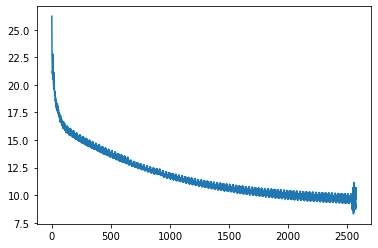

After applying Gaussian filter:


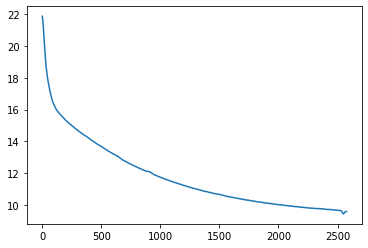

In [19]:
import matplotlib.pyplot as plt # We are using this in order to plot the loss 

plt.plot(losses)
print('The variation of loss function can be seen as:')
plt.show()

# We will use a gaussian filter to smoothen the curve
from scipy.ndimage import gaussian_filter1d

ls = gaussian_filter1d(losses, 10) # Where 1 is the standard deviation
print('After applying Gaussian filter:')
plt.plot(ls)
plt.show()

I am too lazy to plot the boudning boxes. I will just take a sample from the training set and verify the results. I am leaving the rest of work to someone who is really interested in improving his python skills.

In [0]:
# As it would be bore me to upload test images to drive, I am going to test the output from the test image
for i, data in enumerate(train_loader2):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = YOLO2(inputs)
    if i == 0:
      break

"""For bb box confidence""" # Use train_loader1, YOLO1
# outputs = outputs.cpu().detach().numpy()
# outputs = outputs.argmax(axis = 1)
# outputs = outputs[0, :, :]
# print(outputs)
# print(labels[0, :, :, :])

"""For bb box parameters""" # Use train_loader2, YOLO2
# print(outputs[0, 2, :, :])
# print(labels[0, 2, :, :])

""" For class confidence""" # Use train_loader3, YOLO3
# outputs = outputs.cpu().detach().numpy()
# outputs = outputs.argmax(axis = 1)
# outputs = outputs[0, :, :]
# print(outputs)
# print(labels[0, :, :, :])

Currently, I am not that bored. So, I am going to plot the bounding boxes.

The image with bounding boxes is:


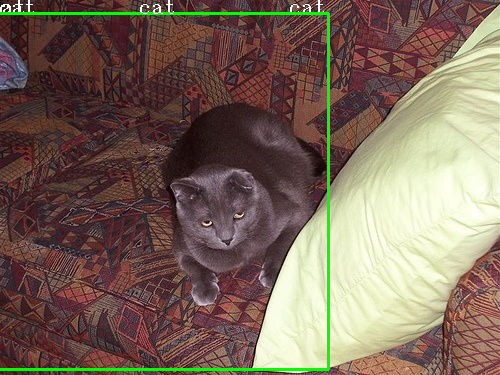

In [79]:
# I will plot the bounding box for the 1st image in training set
for i, data in enumerate(train_loader1):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = YOLO1(inputs)
    if i == 1:
      break

outputs = outputs.cpu().detach().numpy()
outputs = outputs.argmax(axis = 1)
outputs = outputs[1, :, :]

# Find the coordinates wherein the object was detected
coordlist = []
for i in range(7):
  for j in range(7):
    if outputs[i, j] == 1:
      (x, y) = (i, j)
      coordlist.append((x, y))

# Width and height of the original image
width = objectDictList[1][1][5]
height = objectDictList[1][1][6]

# We will find the bounding box parameters
for i, data in enumerate(train_loader2):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = YOLO2(inputs)
    if i == 1:
      break
outputs = outputs.cpu().detach().numpy()
outputs = outputs[1, :, :, :]

# Storing the bb parameters in a list
bbparam = []
(Mx, Ny) = (math.floor(width/7), math.floor(height/7))
for (x, y) in coordlist:
  xc = outputs[0, x, y] * outputs[0, x, y]
  xc = (xc + x) * Mx
  xc = math.floor(xc)
  yc = outputs[1, x, y] * outputs[1, x, y]
  yc = (yc + y) * Ny
  yc = math.floor(yc)
  w = outputs[2, x, y] * outputs[2, x, y]
  if w >= 1:
    w = 0.95
  w = w * width
  w = math.floor(w)
  h = outputs[3, x, y] * outputs[3, x, y]
  if h >= 1:
    h = 0.95
  h = h * height
  h = math.floor(h)
  xmax = xc + (w/2)
  xmax = math.floor(xmax)
  xmin = xc - (w/2)
  xmin = math.floor(xmin)
  ymax = yc + (h/2)
  ymax = math.floor(ymax)
  ymin = yc - (h/2)
  ymin = math.floor(ymin)
  bbparam.append((xmin, ymin, xmax, ymax))

# Finding out the class name 
for i, data in enumerate(train_loader3):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = YOLO3(inputs)
    if i == 1:
      break

outputs = outputs.cpu().detach().numpy()
outputs = outputs.argmax(axis = 1)
outputs = outputs[1, :, :]

clsname = []
for (x, y) in coordlist:
  clsid = outputs[x][y]
  clsname.append(clsid)

classes = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

name = []
for cli in clsname:
  name.append(classes[cli])

# Finally, we will create a bbDict
bbDict = {}
i = 0
for l in range(len(coordlist)):
  bbDict[i] = []
  bbDict[i].append(clsname[i])
  bbDict[i].append(bbparam[i][0])
  bbDict[i].append(bbparam[i][1])
  bbDict[i].append(bbparam[i][2])
  bbDict[i].append(bbparam[i][3])
  i = i + 1

# We will plot the image
# We are defining the arguements of cv2.putText
font                   = cv2.FONT_HERSHEY_COMPLEX_SMALL
fontScale              = 1
fontColor              = (255,255,255)
lineType               = 1

imgn = train_Image_List[1]

for i in range(len(coordlist)):
  (xmin, ymin) = (bbDict[i][1], bbDict[i][2])
  (xmax, ymax) = (bbDict[i][3], bbDict[i][4])
  text = classes[bbDict[i][0]]
  bottomLeftCornerOfText = (xmin + 150, ymin)
  cv2.rectangle(imgn, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
  cv2.putText(imgn,text, 
    bottomLeftCornerOfText, 
    font, 
    fontScale,
    fontColor,
    lineType)
  
print('The image with bounding boxes is:')
cv2_imshow(img)

Oh no. I rerun the above block of code many times. That is why cat is printed many times. Don't take that seriously dude.